In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [3]:
data = pd.read_csv('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/SEATGURU_INFO_AIRCRAFT.csv',';')

In [4]:
data.head()

Data_Source     Airline_name    Aircraft_Type Category Flight_Type  Count  \
0    SeatGuru  aegean-airlines  Airbus A319-100  ECONOMY  short haul    138   
1    SeatGuru  aegean-airlines  Airbus A319-100  ECONOMY  short haul    138   
2    SeatGuru  aegean-airlines  Airbus A319-100  ECONOMY  short haul    138   
3    SeatGuru  aegean-airlines  Airbus A319-100  ECONOMY  short haul    138   
4    SeatGuru  aegean-airlines  Airbus A319-100  ECONOMY  short haul    138   

   Total_seat Seat_Class Seat_Type Seat_Position  ...   Width  \
0         138    Economy  STANDARD      BULKHEAD  ...    18.0   
1         138    Economy  STANDARD        NORMAL  ...    18.0   
2         138    Economy  STANDARD      EXIT_ROW  ...    18.0   
3         138    Economy  STANDARD        NORMAL  ...    18.0   
4         138    Economy  STANDARD        NORMAL  ...    18.0   

  Bedlength_maximum  Bedlength_minimum  Music VideoType  Power_available  \
0               NaN                NaN   NONE      NONE             NONE   
1               NaN                NaN   NONE      NONE             NONE   
2               NaN                NaN   NONE      NONE             NONE   
3               NaN                NaN   NONE      NONE             NONE   
4               NaN                NaN   NONE      NONE             NONE   

   Power_kind Usb_available Usb_kind Rating  
0         NaN          NONE      NaN      2  
1         NaN          NONE      NaN      2  
2         NaN          NONE      NaN      5  
3         NaN          NONE      NaN      3  
4         NaN          NONE      NaN      1  

[5 rows x 24 columns]

In [5]:
print(data.columns)
print(data.shape)

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')
(10330, 24)


In [6]:
dataetu = data[7070:8000]
dataetu

Data_Source         Airline_name      Aircraft_Type  Category  \
7070    SeatGuru                peach    Airbus A320-200   ECONOMY   
7071    SeatGuru                peach    Airbus A320-200   ECONOMY   
7072    SeatGuru                peach    Airbus A320-200   ECONOMY   
7073    SeatGuru                peach    Airbus A320-200   ECONOMY   
7074    SeatGuru                peach    Airbus A320-200   ECONOMY   
7075    SeatGuru                peach    Airbus A320-200   ECONOMY   
7076    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7077    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7078    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7079    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7080    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7081    SeatGuru     pegasus-airlines    Airbus A320-200   ECONOMY   
7082    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7083    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7084    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7085    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7086    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7087    SeatGuru     pegasus-airlines     Airbus A320neo   ECONOMY   
7088    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7089    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7090    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7091    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7092    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7093    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7094    SeatGuru     pegasus-airlines     Boeing 737-800   ECONOMY   
7095    SeatGuru  philippine-airlines               A350  BUSINESS   
7096    SeatGuru  philippine-airlines               A350  BUSINESS   
7097    SeatGuru  philippine-airlines               A350   PREMIUM   
7098    SeatGuru  philippine-airlines               A350   PREMIUM   
7099    SeatGuru  philippine-airlines               A350   ECONOMY   
...          ...                  ...                ...       ...   
7970    SeatGuru               saudia     Boeing 777-200  BUSINESS   
7971    SeatGuru               saudia     Boeing 777-200  BUSINESS   
7972    SeatGuru               saudia     Boeing 777-200     FIRST   
7973    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7974    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7975    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7976    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7977    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7978    SeatGuru               saudia     Boeing 777-200   ECONOMY   
7979    SeatGuru               saudia  Boeing 777-200 V2  BUSINESS   
7980    SeatGuru               saudia  Boeing 777-200 V2  BUSINESS   
7981    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7982    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7983    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7984    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7985    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7986    SeatGuru               saudia  Boeing 777-200 V2   ECONOMY   
7987    SeatGuru               saudia     Boeing 777-300     FIRST   
7988    SeatGuru               saudia     Boeing 777-300  BUSINESS   
7989    SeatGuru               saudia     Boeing 777-300  BUSINESS   
7990    SeatGuru               saudia     Boeing 777-300     FIRST   
7991    SeatGuru               saudia     Boeing 777-300   ECONOMY   
7992    SeatGuru               saudia     Boeing 777-300   ECONOMY   
7993    SeatGuru               saudia     Boeing 777-300   ECONOMY   
7994    SeatGuru               saudia     Boeing 777-300   ECONOMY   
7995    SeatGur

In [7]:
list_type = dataetu['Aircraft_Type'].unique()
list_type

array(['Airbus A320-200', 'Airbus A320neo', 'Boeing 737-800', 'A350',
       'Airbus A320 B', 'Airbus A321', 'Airbus A330-300 V3',
       'Airbus A330 V3', 'Boeing 777-300ER', 'Q300', 'Q400',
       'A320-200 V1', 'Airlines Q400', 'Airways Airbus A330-200 B',
       'Airways Airbus A330-200 C', 'Airways Airbus A330-300',
       'Airways Airbus A380 B', 'Airways Boeing 717-200-125 new',
       'Airways Boeing 717-200 V3', 'Airways Boeing 737-800 V2',
       'Airways Boeing 747-400RR V2', 'Airways Boeing 747-400 4',
       'Airways Boeing 789', 'Airways Dash 8100', 'Airways Dash 8300',
       'Airways Q400', 'Airbus A319', 'Airbus A319 V2', 'Airbus A320 C',
       'Airbus A321 182pax', 'Airbus A321 196pax', 'Airbus A330-200 C',
       'Airbus A330-200 D', 'Airbus A330-200 F', 'Airbus A330-200 G',
       'Airbus A330-300', 'Airbus A330-300 B', 'Airbus A340-600',
       'Airbus A350', 'Airbus A350-900-Qsuites', 'Airbus A380',
       'Boeing 777-200LR', 'Boeing 777-200LR Qsuite',
       'Bo

In [8]:
list_comp = dataetu['Airline_name'].unique()
list_comp

array(['peach', 'pegasus-airlines', 'philippine-airlines', 'porter',
       'qantas', 'qatar-airways', 'regional-express',
       'rossiya---russian-airlines', 'royal-air-maroc', 'royal-brunei',
       'royal-jordanian', 'ryanair', 's7-airlines', 'sas', 'saudia'],
      dtype=object)

In [9]:
data_plane = dataetu.groupby('Airline_name')['Aircraft_Type'].unique().apply(list).reset_index(name='Aircraft_Type_comp')
data_plane

Airline_name  \
0                        peach   
1             pegasus-airlines   
2          philippine-airlines   
3                       porter   
4                       qantas   
5                qatar-airways   
6             regional-express   
7   rossiya---russian-airlines   
8              royal-air-maroc   
9                 royal-brunei   
10             royal-jordanian   
11                     ryanair   
12                 s7-airlines   
13                         sas   
14                      saudia   

                                   Aircraft_Type_comp  
0                                   [Airbus A320-200]  
1   [Airbus A320-200, Airbus A320neo, Boeing 737-800]  
2   [A350, Airbus A320 B, Airbus A321, Airbus A330...  
3                                     [Airlines Q400]  
4   [Airways Airbus A330-200 B, Airways Airbus A33...  
5   [Airbus A319, Airbus A319 V2, Airbus A320 B, A...  
6                                         [SAAB 340B]  
7   [-800 D, A319-100 A, A319-100 B, A320-200 A, A...  
8   [ATR 72-600, Boeing 737-700, Boeing 737-800, B...  
9   [Airbus A320, Airbus A320 V2, Airlines Boeing ...  
10  [Airbus A319, Airbus A320, Airbus A321, Airbus...  
11                                   [Boeing 737-800]  
12                       [A319 V2, A320, A321, 7-800]  
13  [Airlines Airbus A319, Airlines Airbus A320, A...  
14  [Airbus A319, Airbus A320, Airbus A320 V2, Air...

In [10]:
l = []
for i in range(len(data_plane)):
    l.append(len(data_plane['Aircraft_Type_comp'][i]))
data_plane['nb_aircraft_type'] = l
data_plane

Airline_name  \
0                        peach   
1             pegasus-airlines   
2          philippine-airlines   
3                       porter   
4                       qantas   
5                qatar-airways   
6             regional-express   
7   rossiya---russian-airlines   
8              royal-air-maroc   
9                 royal-brunei   
10             royal-jordanian   
11                     ryanair   
12                 s7-airlines   
13                         sas   
14                      saudia   

                                   Aircraft_Type_comp  nb_aircraft_type  
0                                   [Airbus A320-200]                 1  
1   [Airbus A320-200, Airbus A320neo, Boeing 737-800]                 3  
2   [A350, Airbus A320 B, Airbus A321, Airbus A330...                 9  
3                                     [Airlines Q400]                 1  
4   [Airways Airbus A330-200 B, Airways Airbus A33...                13  
5   [Airbus A319, Airbus A319 V2, Airbus A320 B, A...                25  
6                                         [SAAB 340B]                 1  
7   [-800 D, A319-100 A, A319-100 B, A320-200 A, A...                13  
8   [ATR 72-600, Boeing 737-700, Boeing 737-800, B...                 8  
9   [Airbus A320, Airbus A320 V2, Airlines Boeing ...                 3  
10  [Airbus A319, Airbus A320, Airbus A321, Airbus...                 7  
11                                   [Boeing 737-800]                 1  
12                       [A319 V2, A320, A321, 7-800]                 4  
13  [Airlines Airbus A319, Airlines Airbus A320, A...                12  
14  [Airbus A319, Airbus A320, Airbus A320 V2, Air...                11

In [11]:
sum(data_plane['nb_aircraft_type'])

112

In [6]:
# Test template matching

#img_rgb = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aegean_Airlines_Airbus_A320-200_plane2.svg.png')
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#template = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/v8L1gg1.jpeg',0)
#w, h = template.shape[::-1]

#res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#threshold = 0.8
#loc = np.where( res >= threshold)
#for pt in zip(*loc[::-1]):
#    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#cv2.imwrite('res.png',img_rgb)

True

In [4]:
list_img_SEATGURU = os.listdir('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU')
list_img_SEATGURU

['Iberia_Airbus_A321_plane498.svg.png',
 'Hong_Kong_Airlines_A330-300_V1_plane483.jpg',
 'Oman_Air_Boeing_737-700_new_plane686.jpg',
 'Air_France_ATR-72-600_plane94.svg.png',
 'Volotea_Airlines_V7_Boeing_717-200_plane328.svg.png',
 'Turkish_Airlines_Boeing_737-800_C_plane958.svg.png',
 'Azul_Airlines_Airbus_A320neo_plane242.jpg',
 'ANA_Boeing_767-300ER_A_plane295.jpg',
 'Qatar_Airways_Airbus_A321_plane746.svg.png',
 'American_Airlines_CRJ200_plane186.svg.png',
 'Aeroflot_Russian_Airlines_Airbus_A321_V2_plane10.jpg',
 'Qatar_Airways_Airbus_A350-900-Qsuites_plane733.svg.png',
 'Royal_Brunei_Airbus_A320_V2_plane773.jpg',
 'United_Airlines_Boeing_767-300_V3_plane968.svg.png',
 'Volotea_Airlines_V7_Airbus_A320-200_plane327.svg.png',
 'United_Airlines_Airbus_A320_V3_plane982.svg.png',
 'Air_Canada_Airbus_A320_B_plane34.svg.png',
 'Singapore_Air_Boeing_787-10_plane838.svg.png',
 'Volaris_Airlines_Airbus_A319_plane322.jpg',
 'Philippine_Airlines_Boeing_777-300ER_plane704.svg.png',
 'Icelandair

In [5]:
list_img_SEATGURU.index('Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')

846

# Test normé images: Pré process

In [79]:
data_path = "/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/"

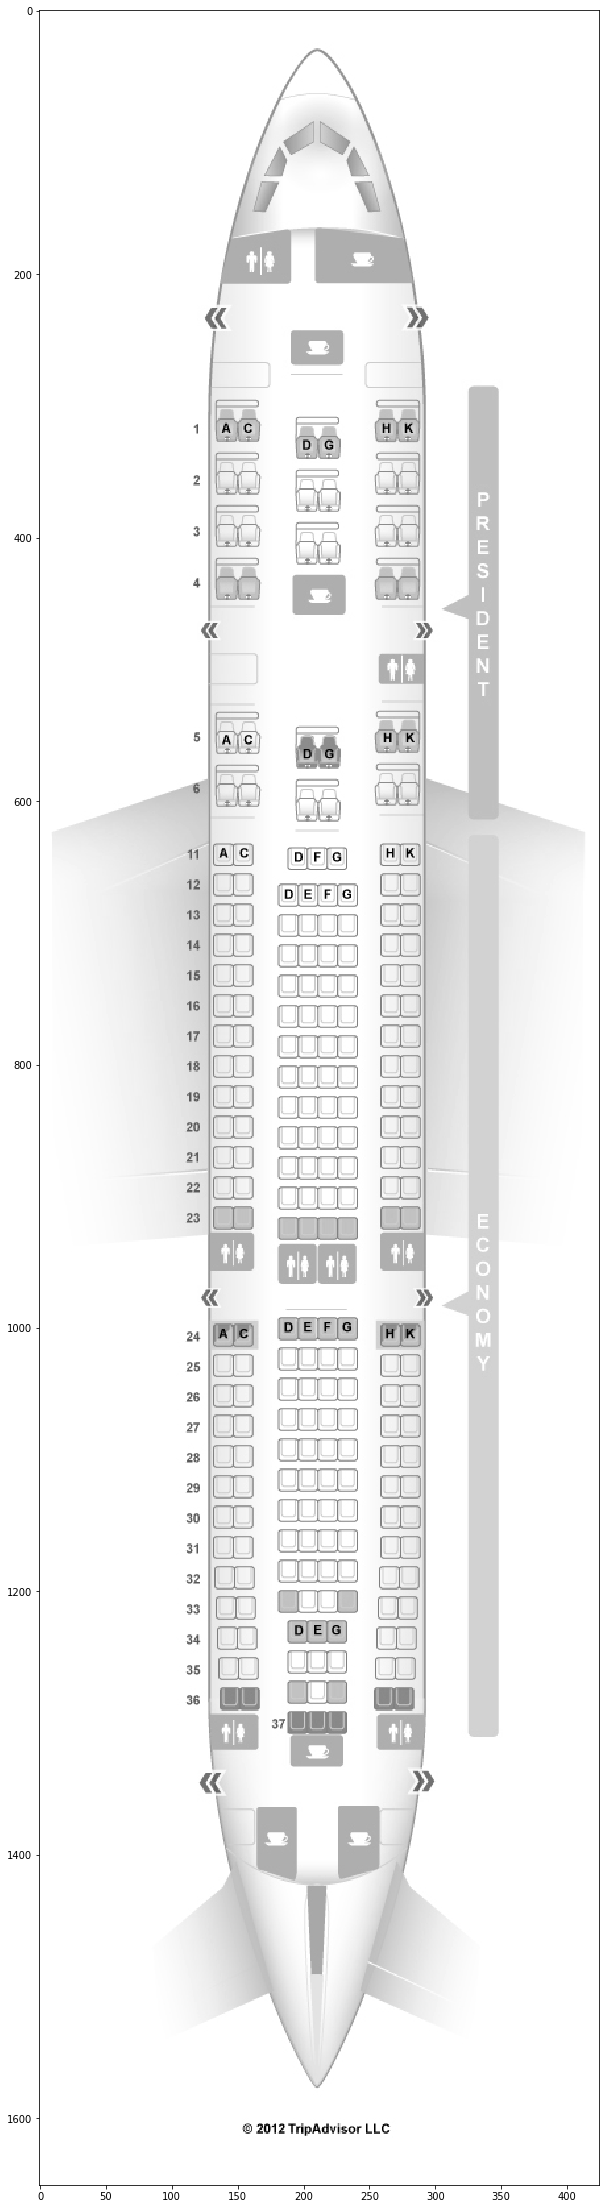

In [80]:
layout = "LAYOUT SEATGURU/"
data_path + layout + list_img_SEATGURU[846]

img = plt.imread(data_path + layout + list_img_SEATGURU[846])
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,40))
plt.imshow(imgray, cmap='gray')

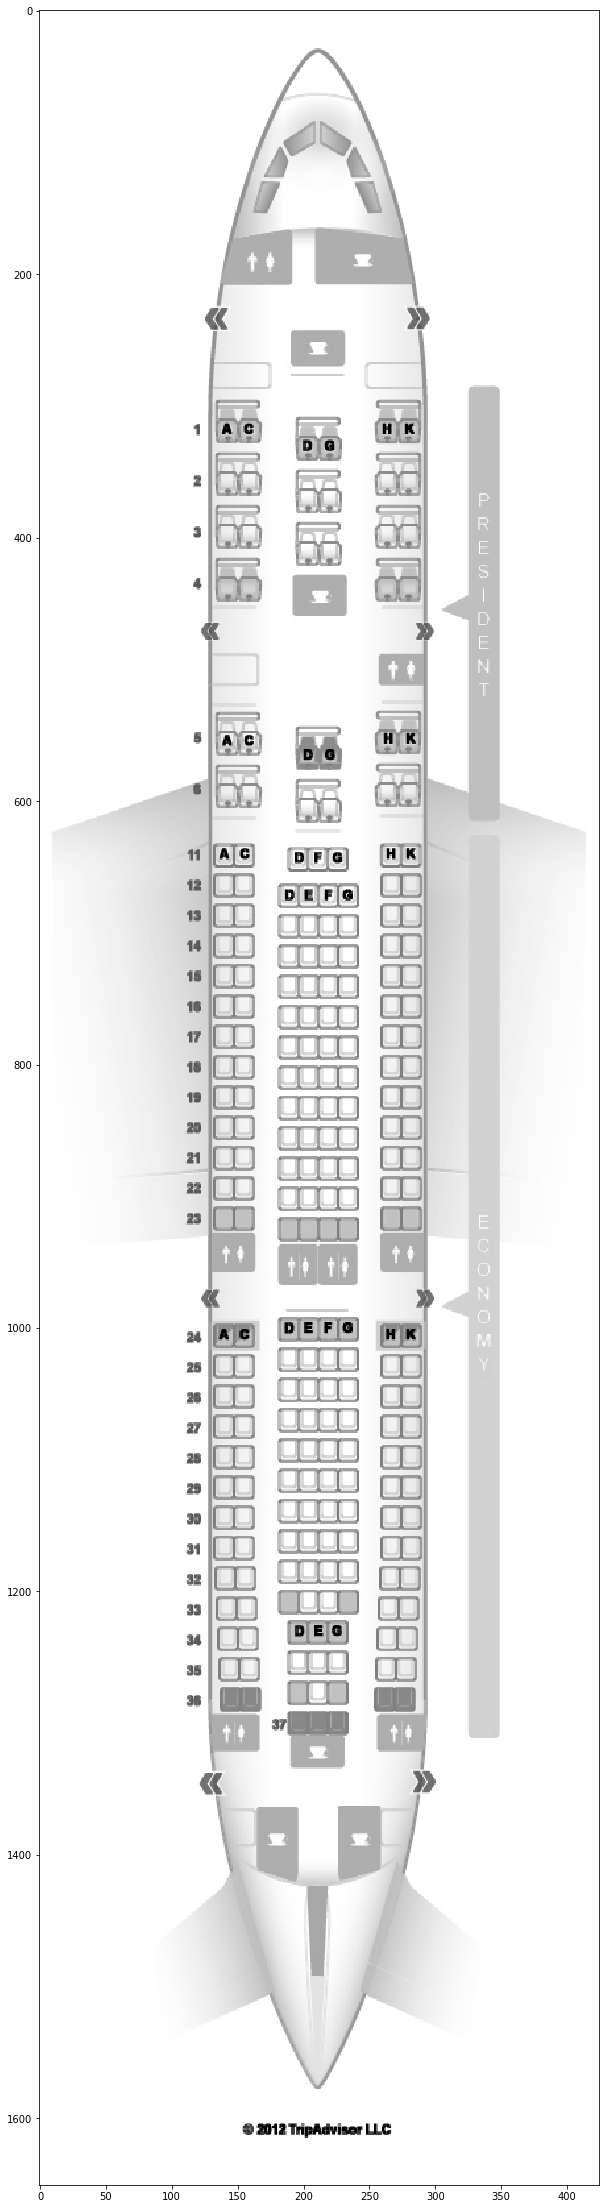

In [52]:
# Erosion:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(erosion, cmap='gray')

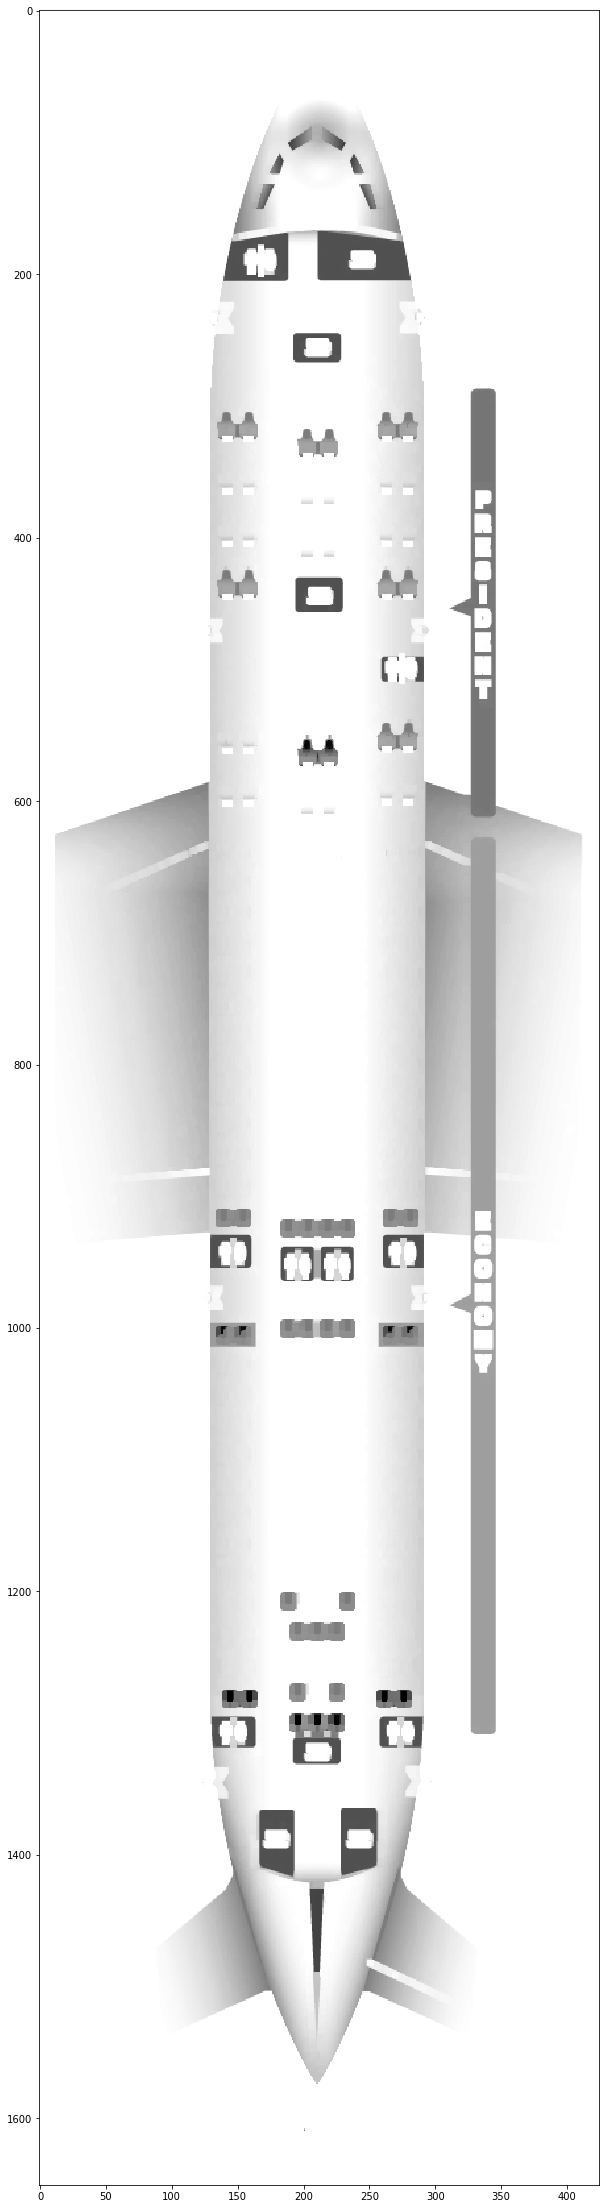

In [24]:
# Dilation:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(dilation, cmap='gray')

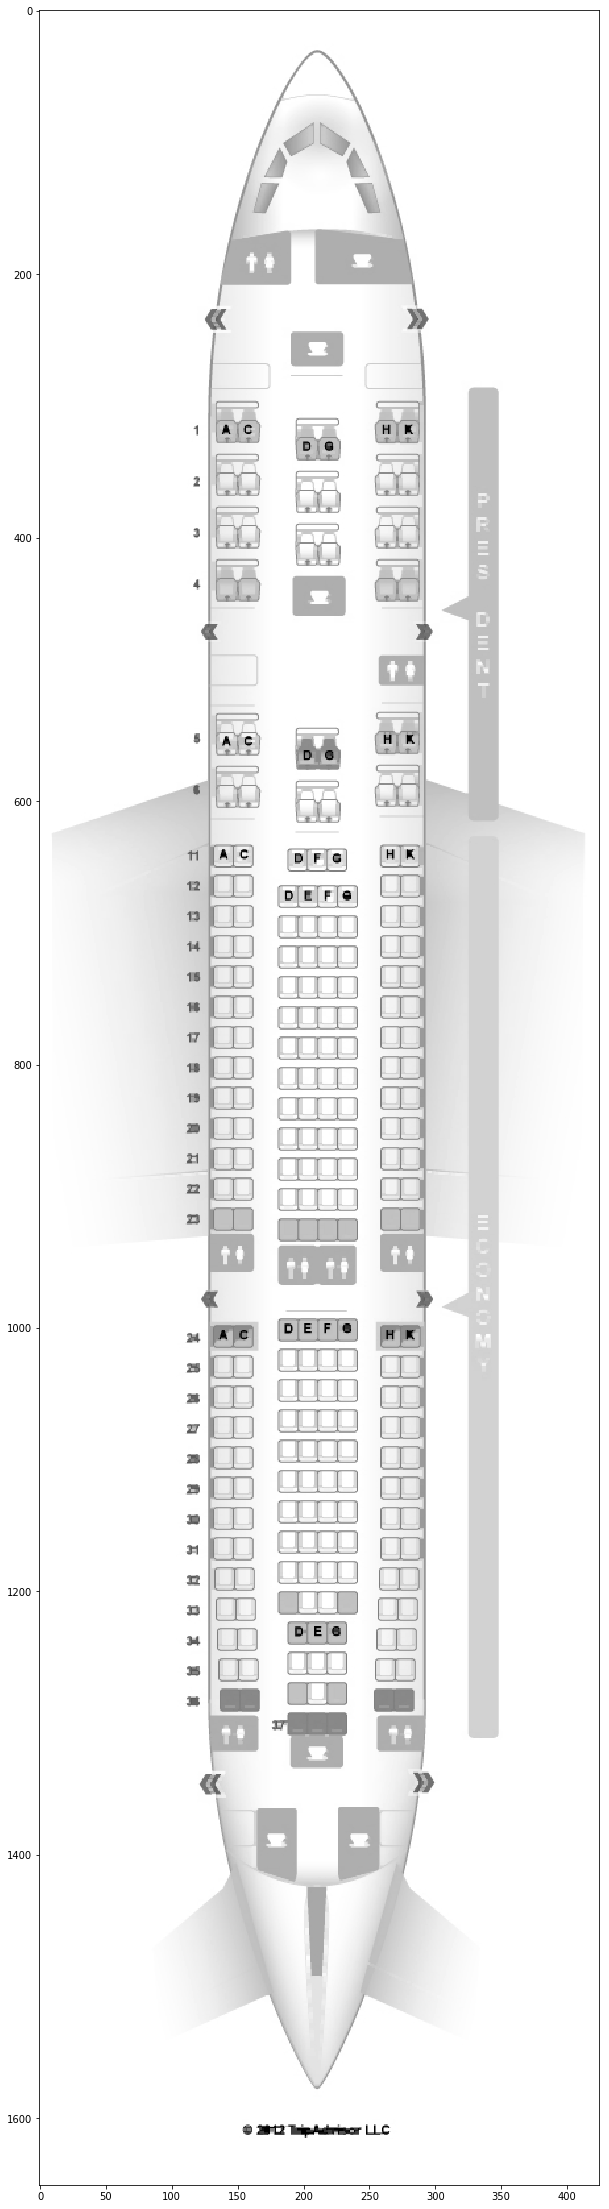

In [51]:
# Opening:
kernel = np.ones((2,3),np.uint8)
opening = cv2.morphologyEx(imgray, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20,40))
plt.imshow(opening, cmap='gray')

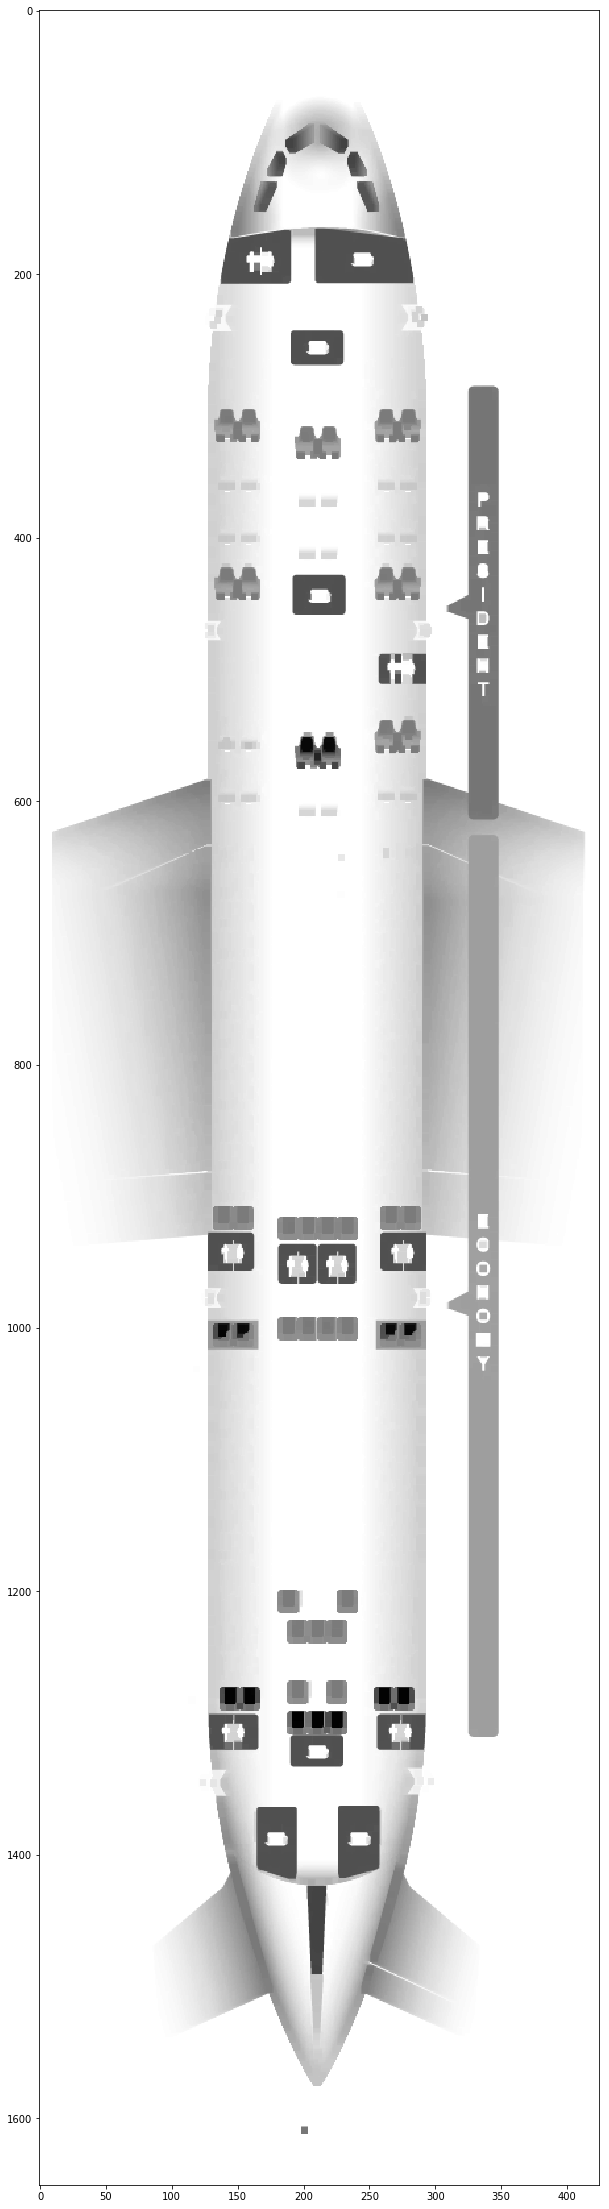

In [26]:
# Closing: toilette cafe fauteille de couleur
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(20,40))
plt.imshow(closing, cmap='gray')

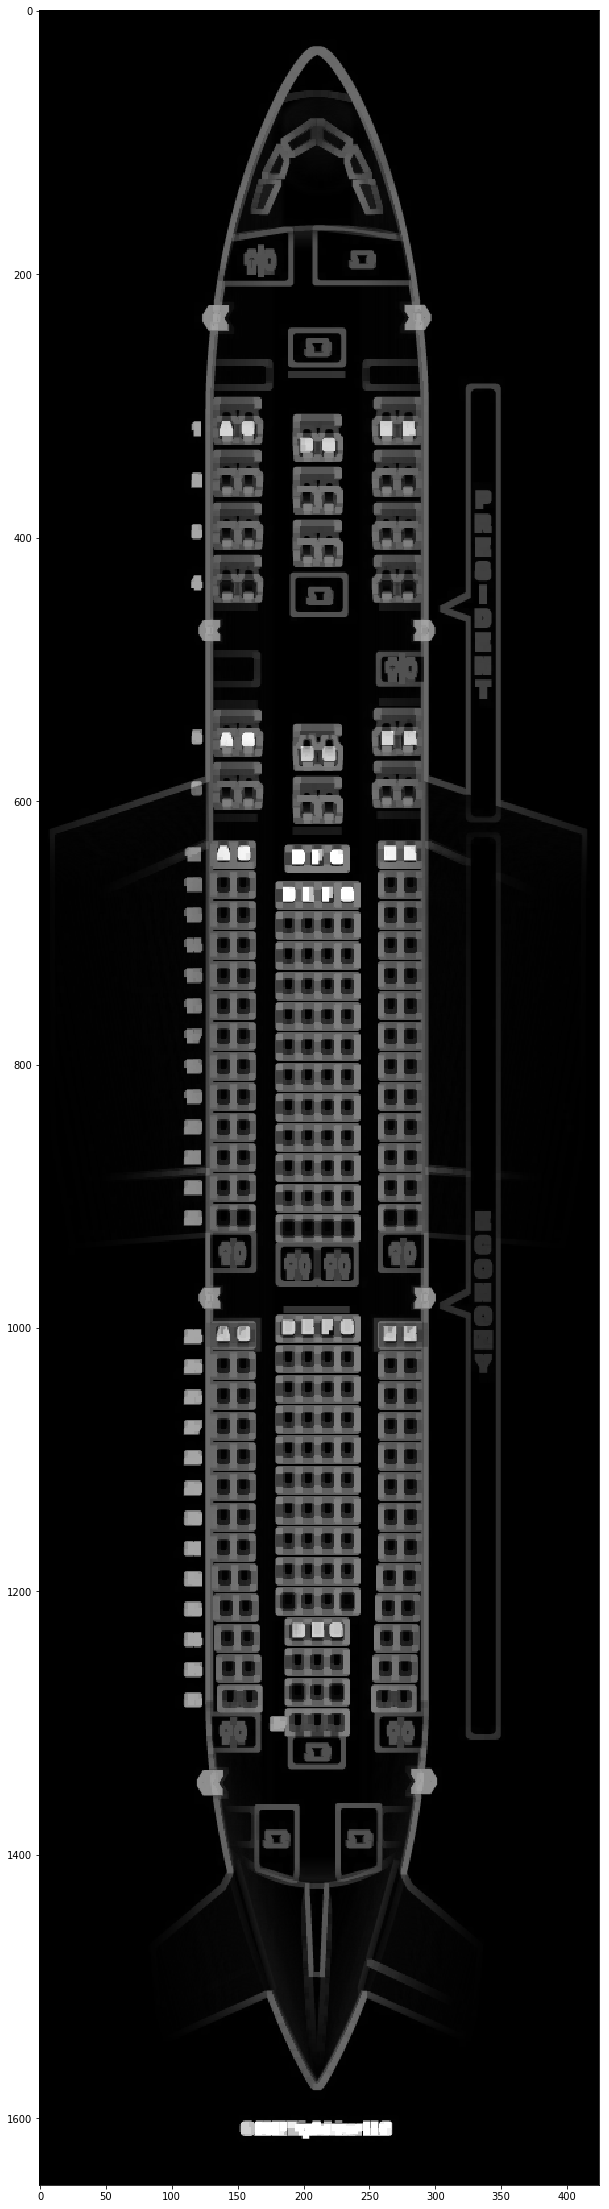

In [27]:
# Morphological gradient: toilette cafe
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(gradient, cmap='gray')

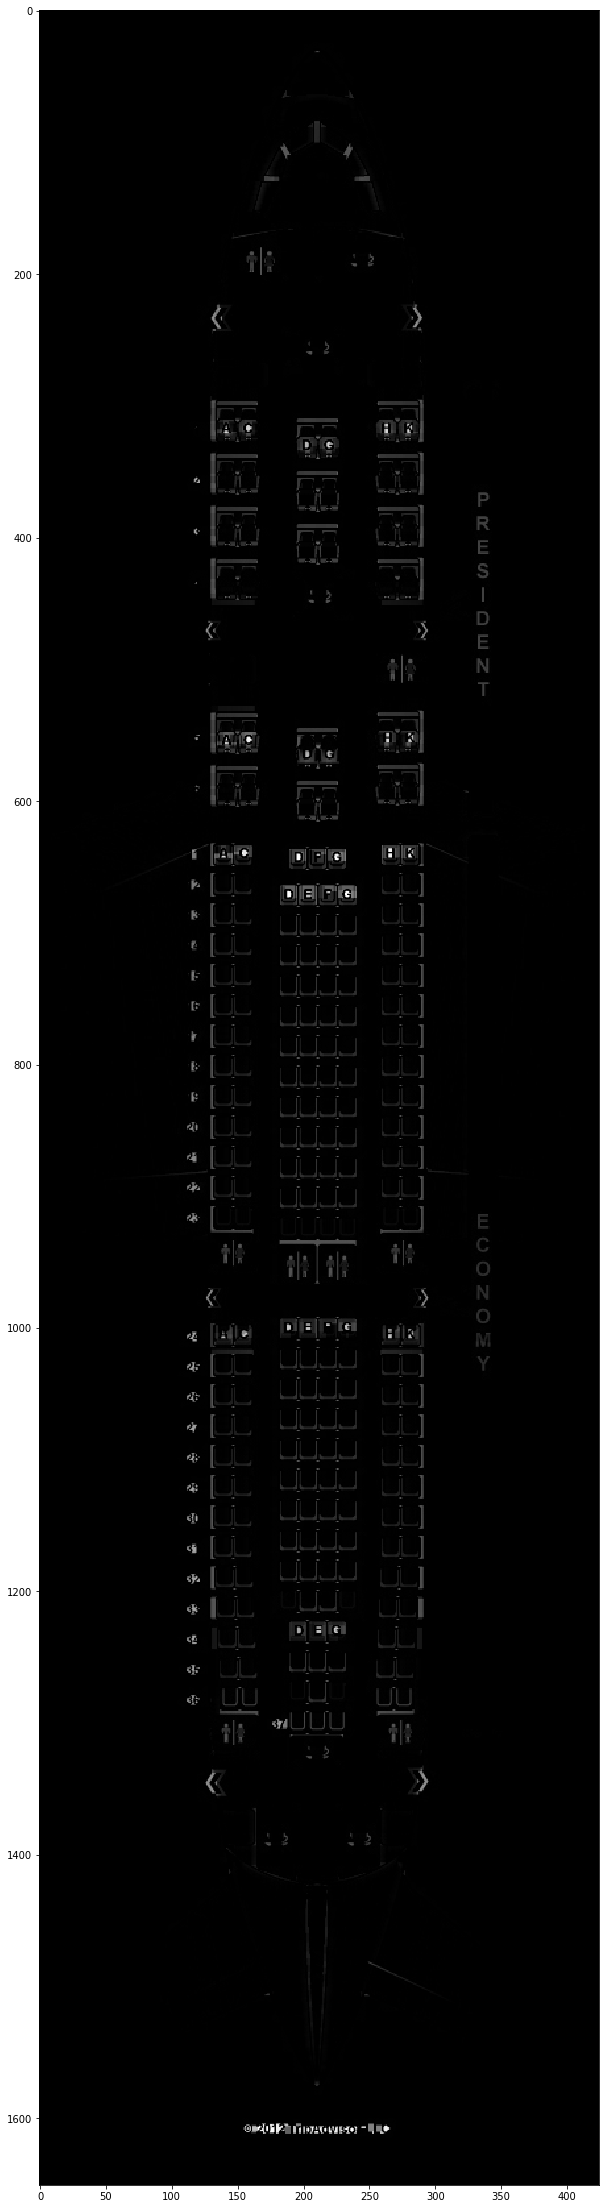

In [28]:
# Top hat: (toilettes 'exit' et lettre)
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(imgray, cv2.MORPH_TOPHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(tophat, cmap='gray')

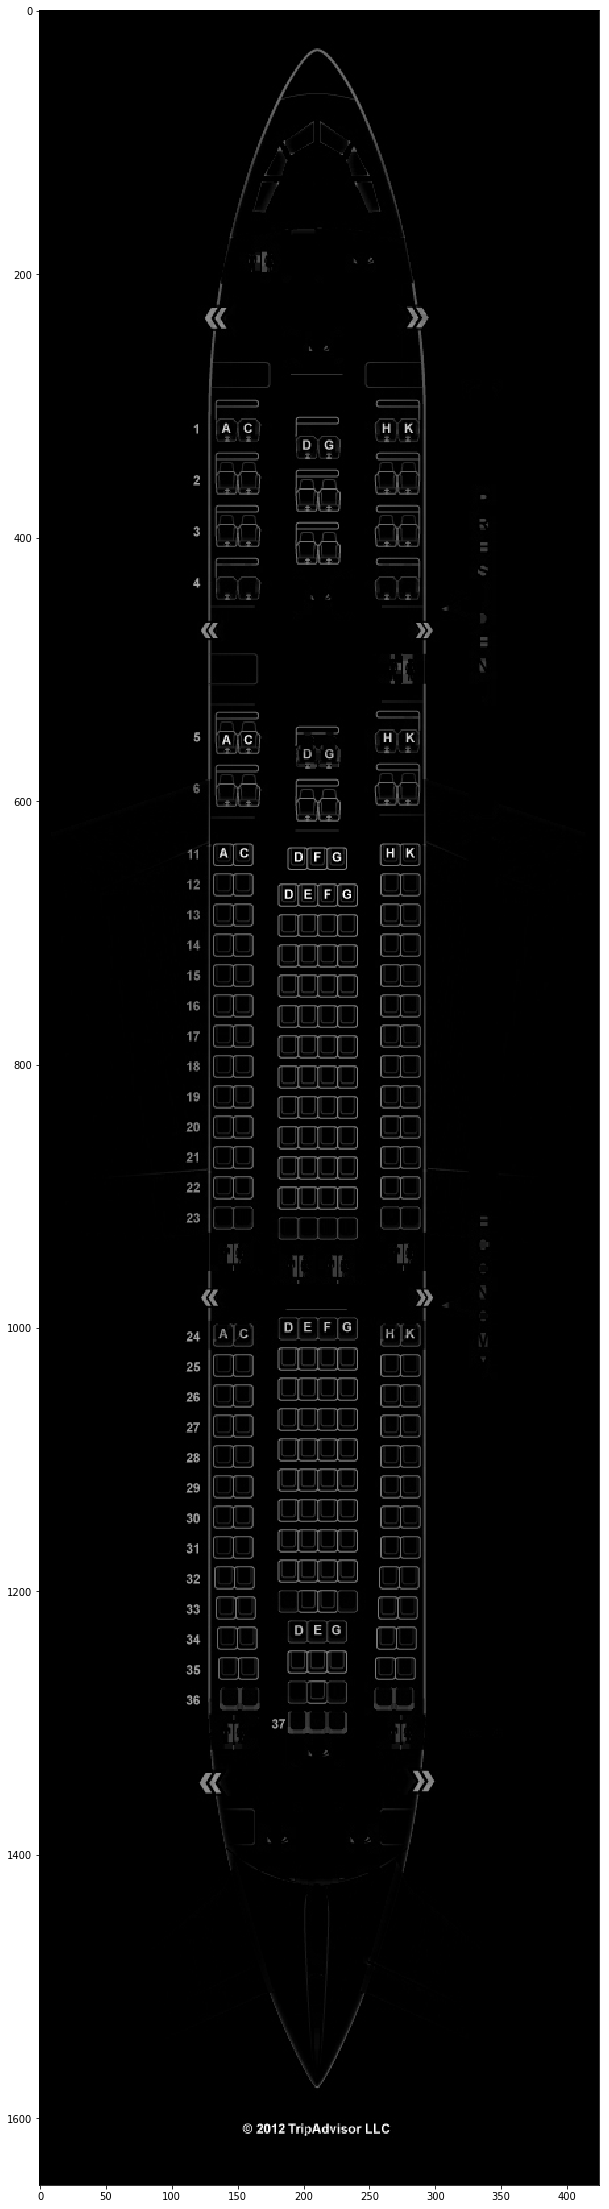

In [29]:
# Black hat: Bon pour les lettres, fauteilles et 'exit'
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(imgray, cv2.MORPH_BLACKHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(blackhat, cmap='gray')

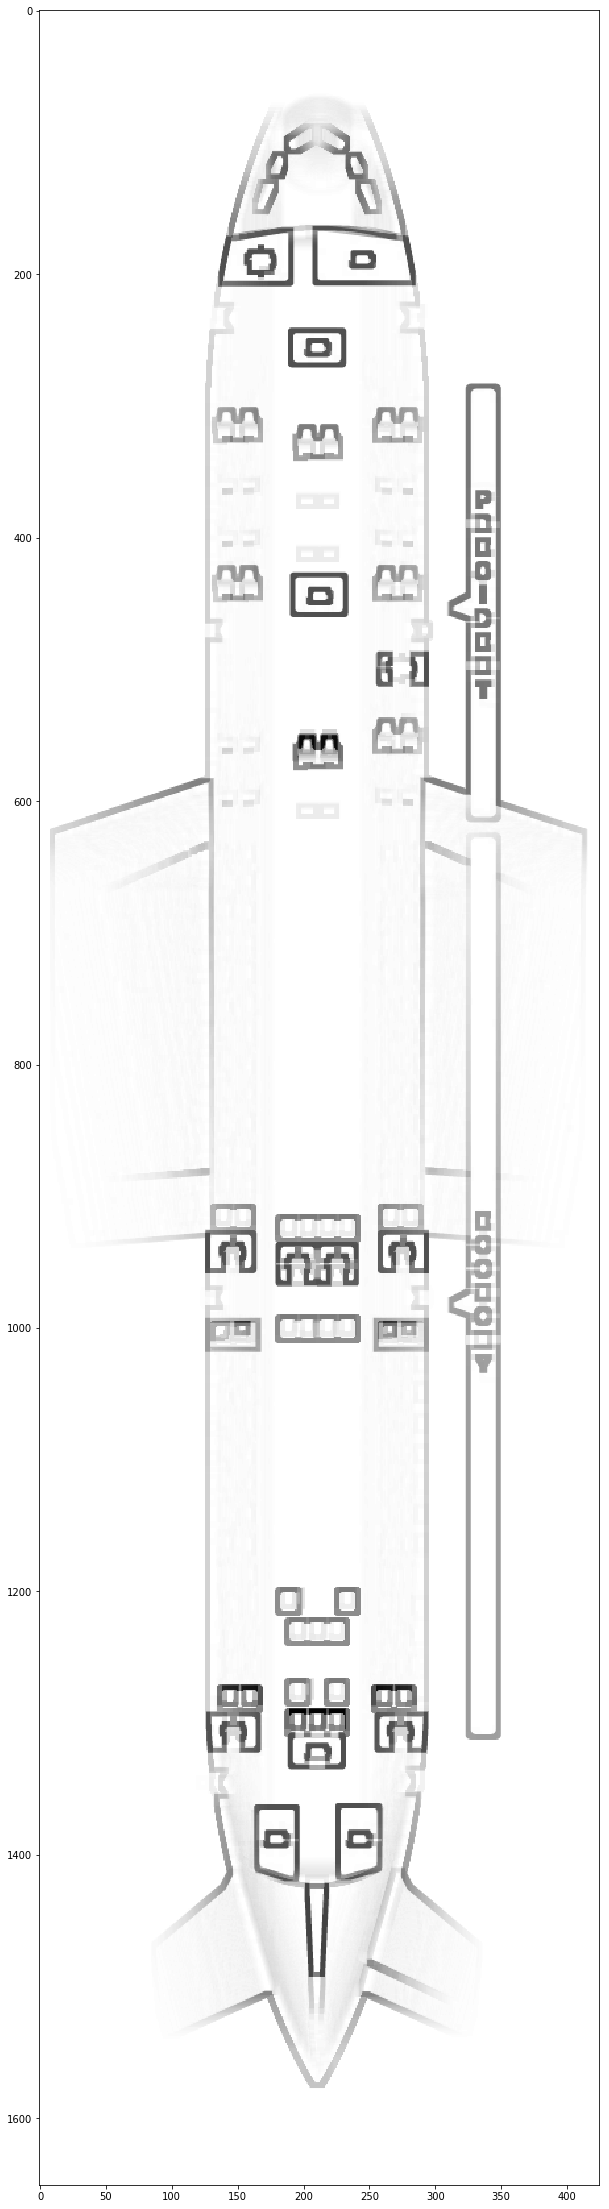

In [34]:
# Test closing + morphological gradient
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
gradient = ~gradient
plt.figure(figsize=(20,40))
plt.imshow(gradient, cmap='gray')

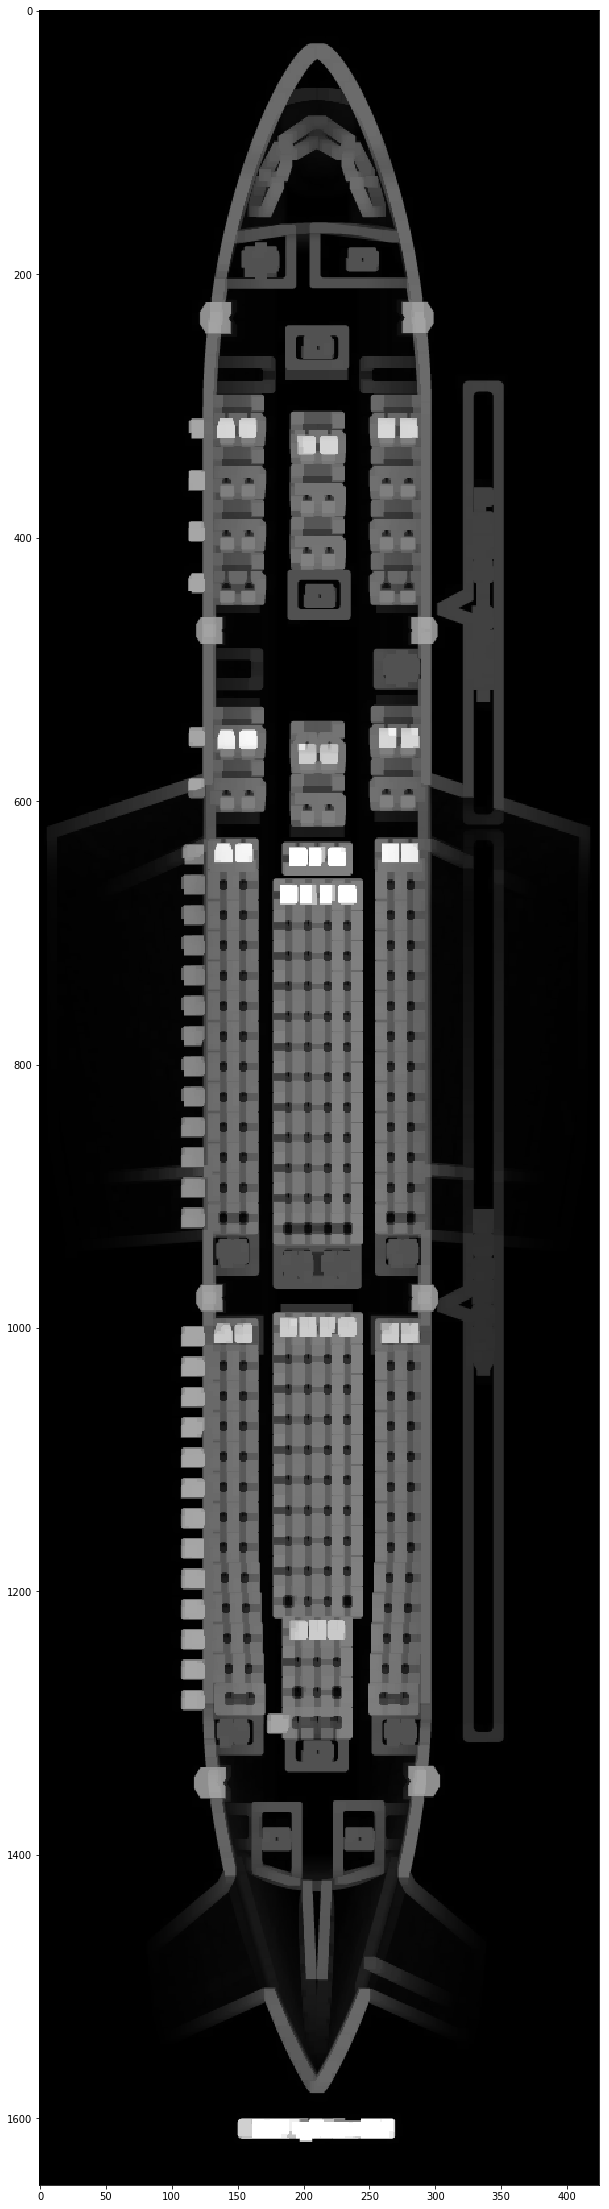

In [39]:
# Test morpho gradient + dilation
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(gradient,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
erosion = ~erosion
plt.figure(figsize=(20,40))
plt.imshow(dilation, cmap='gray')

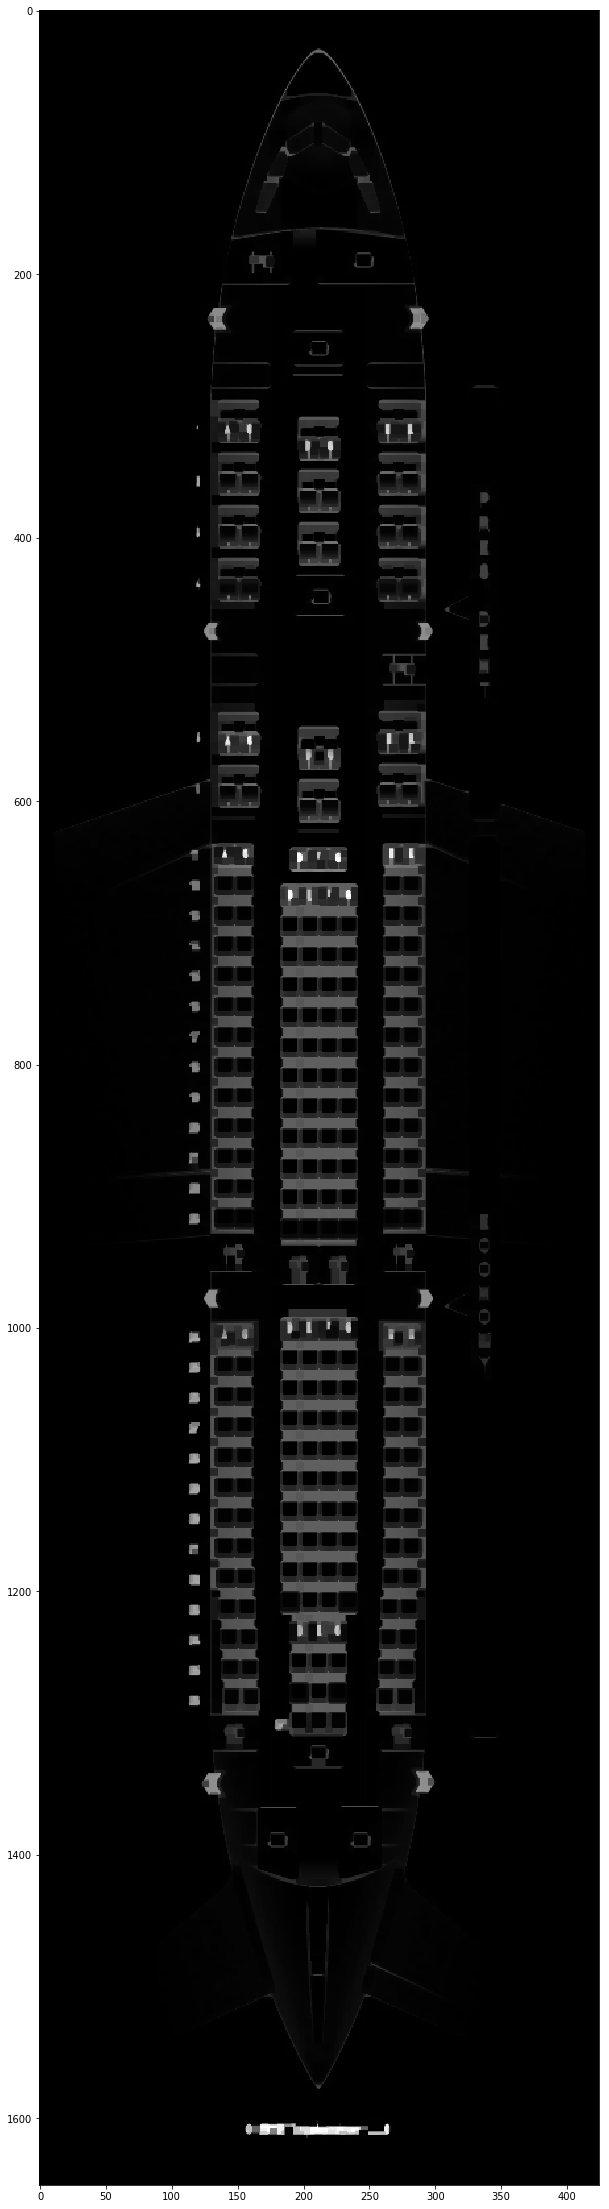

In [74]:
# morfo gradient + erosion
kernel = np.ones((6,4),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,6),np.uint8)
erosion = cv.erode(gradient,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(erosion, cmap='gray')

# Test isolé couleur

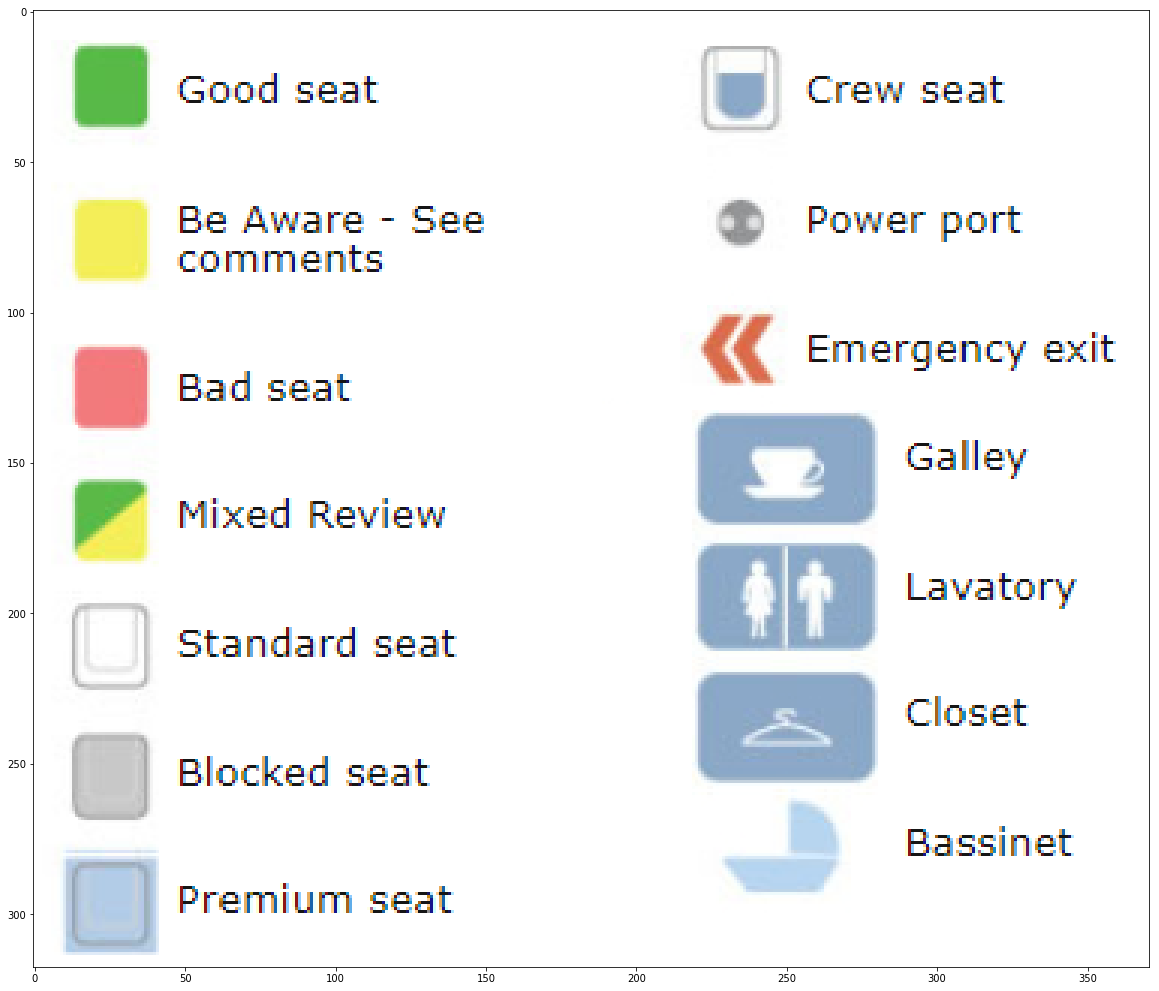

In [54]:
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

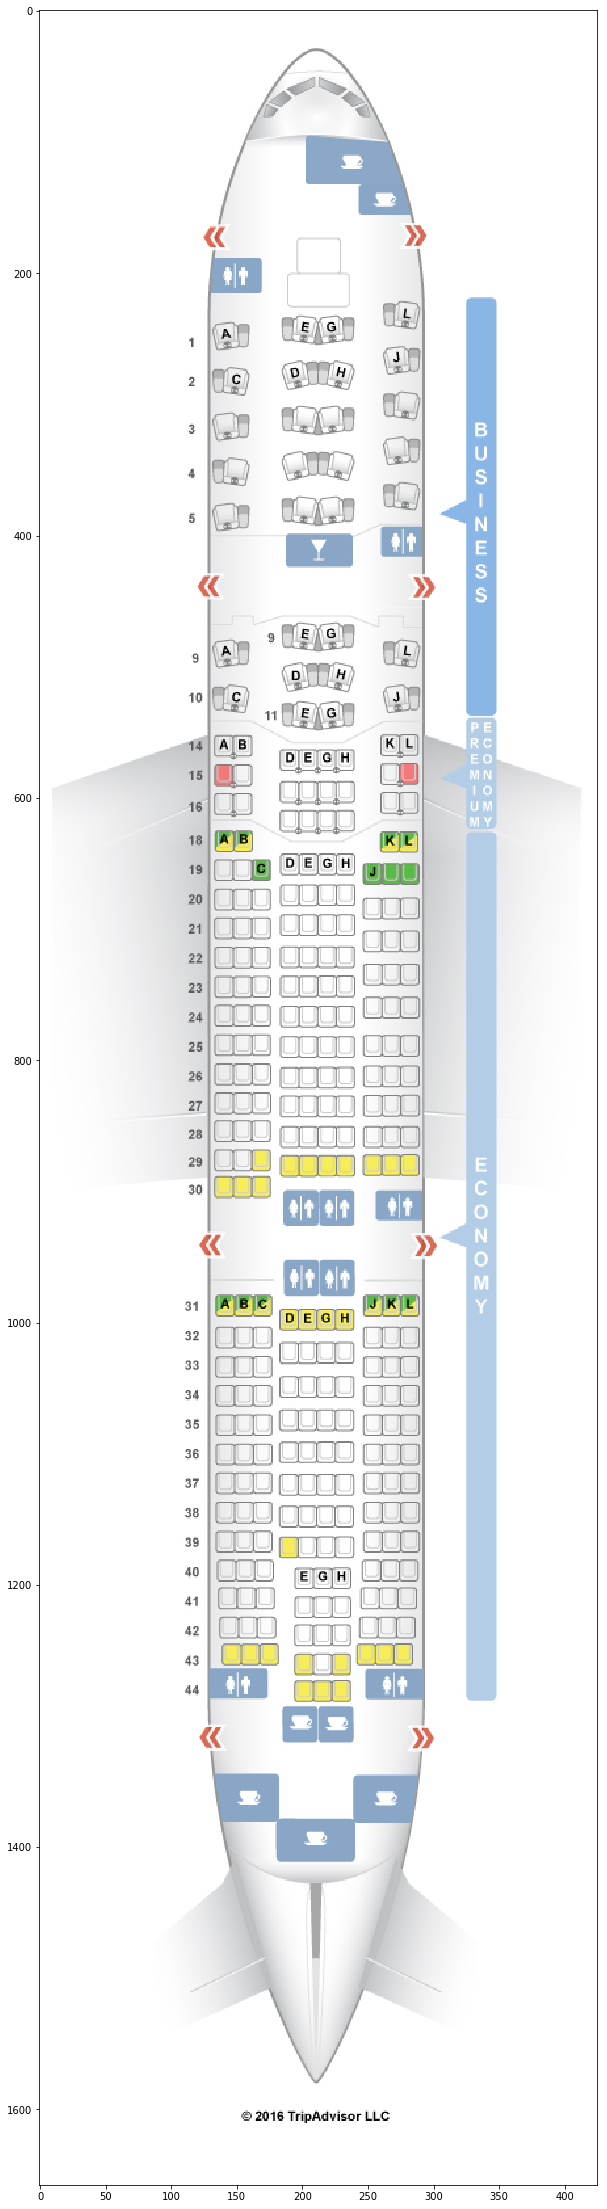

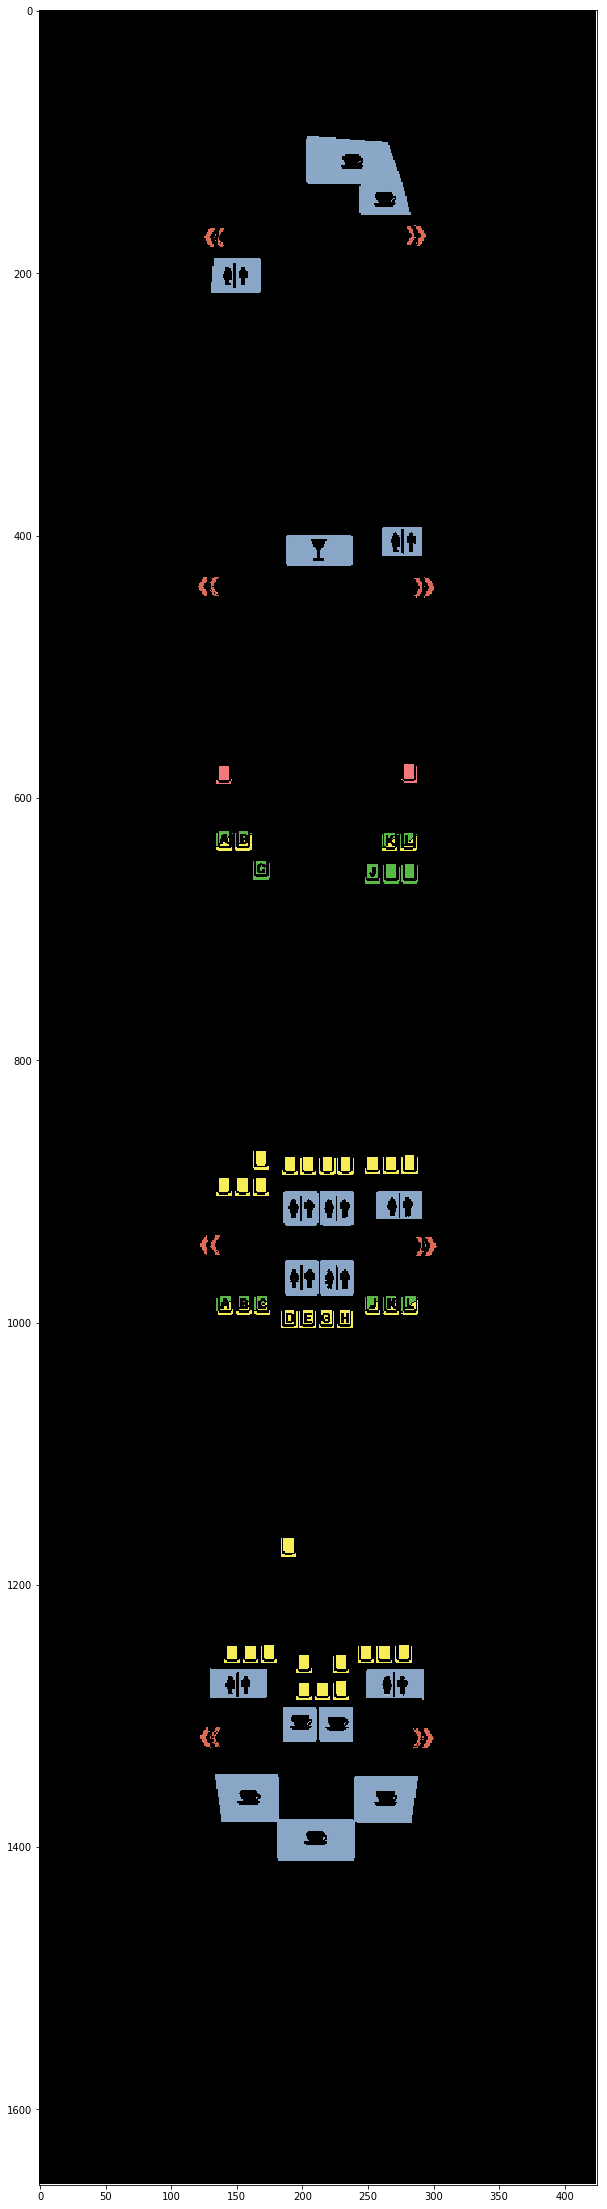

In [121]:
# img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Alitalia_Airlines_Boeing_777-200_plane153.jpg')
img_copy = img.copy()

blue = [139, 168, 198]
yellow = [247, 237, 86]
green = [89, 185, 71]
red_bad_seat = [244, 121, 123]
red_exit = [222, 111, 100]
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        pixel = [int(val) for val in img[i][j]]
        if sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, bleu)]) != 3 and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_exit)]) != 3 and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, yellow)]) != 3 and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, green)]) != 3 and sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_bad_seat)]) != 3:
            img_copy[i][j] = [0., 0., 0.]
plt.figure(0,figsize=(20,40))
plt.imshow(img)
plt.figure(1,figsize=(20,40))
plt.imshow(img_copy)

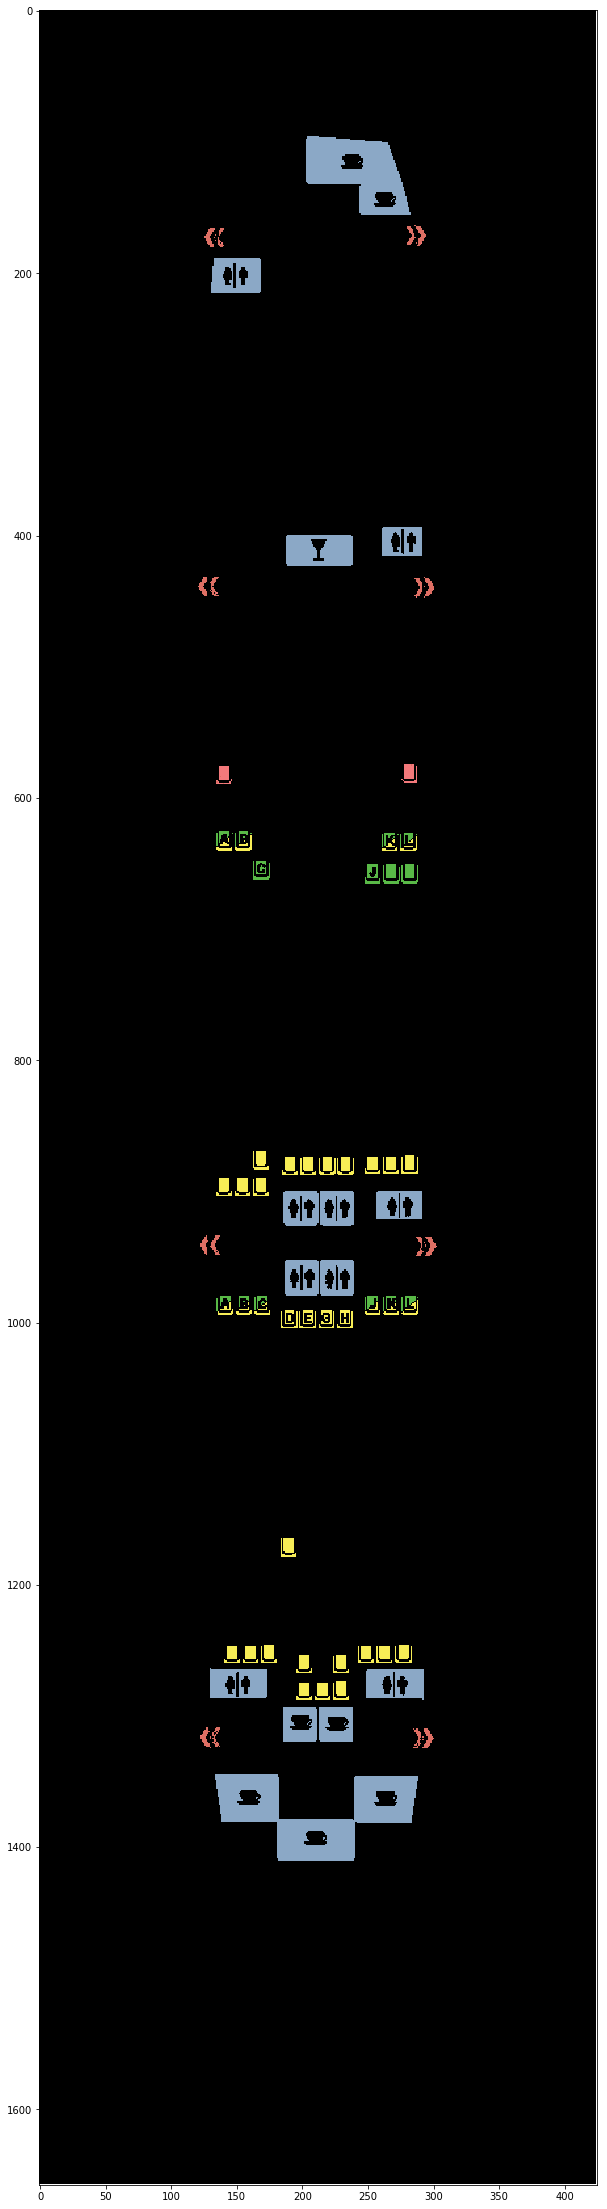

In [27]:
# img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Alitalia_Airlines_Boeing_777-200_plane153.jpg')
img_copy = img.copy()

blue = [139, 168, 198]
yellow = [247, 237, 86]
green =  [89, 185, 71]
red_bad_seat =[244, 121, 123]
exit = [222, 111, 100]
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        pixel = [int(val) for val in img[i][j]]
        if sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, blue)]) == 3:
            img_copy[i][j] = blue
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, exit)]) == 3:
            img_copy[i][j] = exit 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, yellow)]) == 3:
            img_copy[i][j] = yellow 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, green)]) == 3:
            img_copy[i][j] = green 
        elif sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, red_bad_seat)]) == 3:
            img_copy[i][j] = red_bad_seat
        else:
            img_copy[i][j] = [0., 0., 0.]
plt.figure(figsize=(20,40))
plt.imshow(img_copy)

In [19]:
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
img_copy = img.copy()
img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
print(img_copy[1750][180])
print(img_copy[1750][180]*255)
print(img_copy[1250][150])
print(img_copy[1250][150]*255)

[0.9529412 0.9529412 0.9529412]
[243. 243. 243.]
[0.05098039 0.7529412  0.9647059 ]
[ 13. 192. 246.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


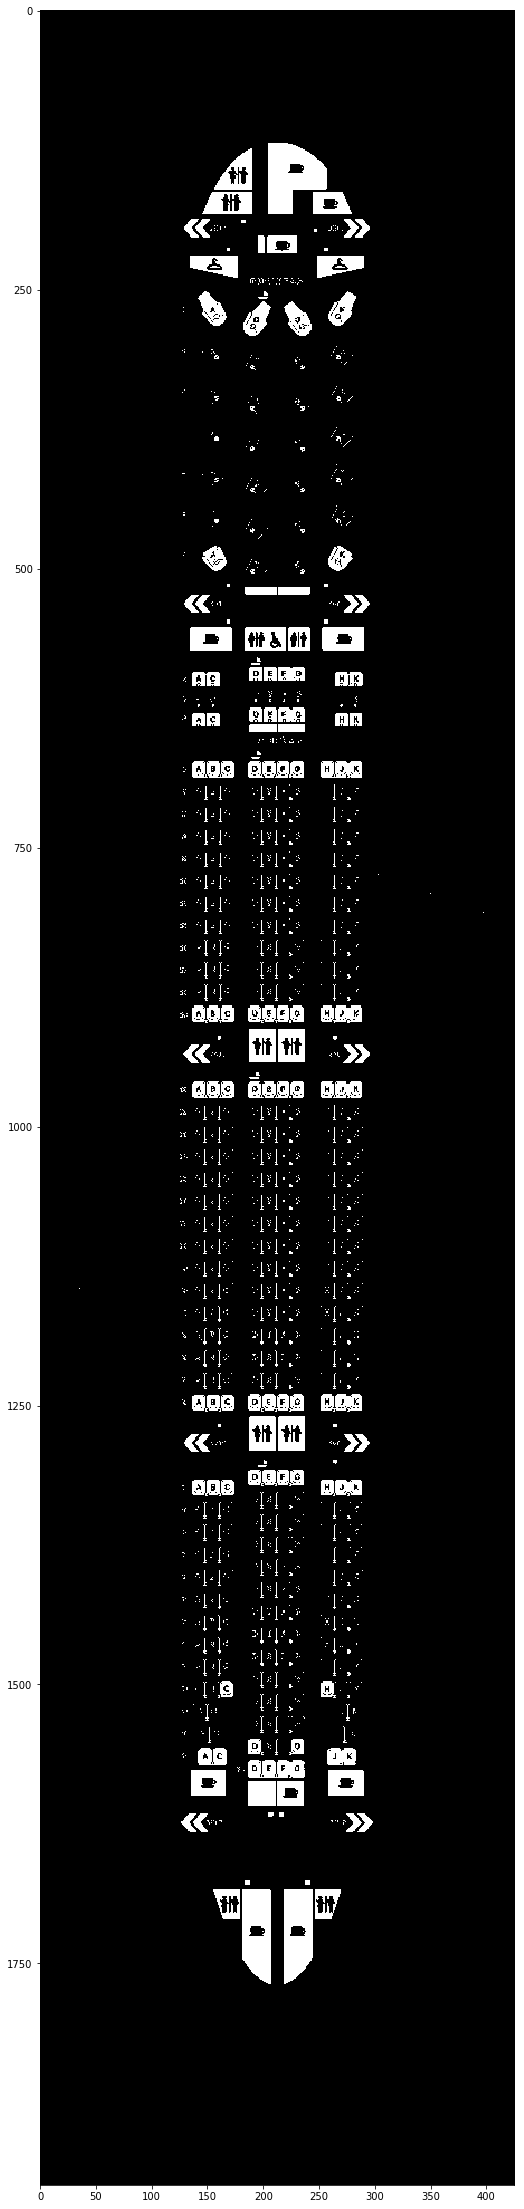

In [30]:
from PIL import Image

def visualisation(image):
    plt.figure(figsize=(20,40))
    plt.imshow(image)
    
def to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def colour_detection(image, dico_colours, epsilon = 20, rgb_len = 3):
    # make a copy to avoid to erase the original image
    img_copy = to_rgb(image)
    
    # for each line we get the pixel value
    for i, line in enumerate(image):
        for j, pixel in enumerate(line):
            
            # Get only 3 first value corresponding to R,G,B
            pixel = [int(val) if val > 1.0 else int(val*255) for val in img[i][j]]            
            # default value
            img_copy[i][j] = [0, 0, 0]
            
            # for each colour we change the pixel value if we find the same colour
            for type_colour in dico_colours.keys():
                for c, colour in enumerate(dico_colours[type_colour]):
                    to_compare = dico_colours[type_colour][c]
                    if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, to_compare)]) == rgb_len:
                        img_copy[i][j] = colour
    return img_copy

img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
dico_cols = {
    "blue":[[139, 168, 198],[41,182,209]], 
    "yellow": [[247, 237, 86],[251,200,2]], 
    "exit": [[222, 111, 100],[190,190,190]], 
    "green": [[89, 185, 71],[41,209,135]], 
    "red_bad_seat": [[244, 121, 123],[226,96,82]]
}

visualisation(colour_detection(img, dico_cols))

In [ ]:
colours = {
    'seatguru': {
        'yellow':
        'blue'
    }
    'maestro': {
        'yellow':
        'blue'
    }
}

function(image, dictio_cols, 'seatguru')
if val
    # replace by the colour from the dicito
    for type_colour in dictio_cols[mode]:
        for colour in dictio_cols[mode][type_colour]
            if //
                assignation
else:
    default value = [0,0,0]
    # replace for a colour by a default value
    for type_colour in dictio_cols[mode]:
        for colour in dictio_cols[mode][type_colour]
            if //
                assignation
            
        

In [ ]:
dico_cols = {
    "blue":[[139, 168, 198],[41,182,209],[81,101,181]], 
    "yellow": [[247, 237, 86],[251,200,2],[0,0,0]], 
    "exit": [[222, 111, 100],[190,190,190],[1,120,175]], 
    "green": [[89, 185, 71],[41,209,135],[120,189,198]], 
    "red_bad_seat": [[244, 121, 123],[226,96,82],[207,90,150]],
    "blue_seat_crew": [[140,169,202],[41,182,209],[138,165,190]],
    "baby": [[184,214,240],[197,197,197],[0,0,0]]
}

In [ ]:
dico_colours = {
    'seatguru': {
        'jpg':{
            "blue":[139, 168, 198], 
            "yellow": [247, 237, 86], 
            "exit": [222, 111, 100], 
            "green": [89, 185, 71], 
            "red_bad_seat": [244, 121, 123],
            "blue_seat_crew": [140,169,202],
            "baby": [184,214,240]
        }
        'png'{
            "blue":[41,182,209], 
            "yellow": [251,200,2], 
            "exit": [190,190,190], 
            "green": [41,209,135], 
            "red_bad_seat": [226,96,82],
            "blue_seat_crew": [41,182,209],
            "baby": [197,197,197]
        }
    }
    'maestro': {
        "blue":[81,101,181],
        "exit": [1,120,175], 
        "green": [120,189,198], 
        "red_bad_seat": [207,90,150],
        "blue_seat_crew": [138,165,190],
    }
}


dico_colours = {
    'seatguru': {
        "blue":[[139, 168, 198],[41,182,209]], 
        "yellow": [[247, 237, 86],[251,200,2]], 
        "exit": [[222, 111, 100],[190,190,190]], 
        "green": [[89, 185, 71],[41,209,135]], 
        "red_bad_seat": [[244, 121, 123],[226,96,82]],
        "blue_seat_crew": [[140,169,202],[41,182,209]],
        "baby": [[184,214,240],[197,197,197]]
    }
    'maestro': {
        "blue":[81,101,181],
        "exit": [1,120,175], 
        "green": [120,189,198], 
        "red_bad_seat": [207,90,150],
        "blue_seat_crew": [138,165,190],
    }
}

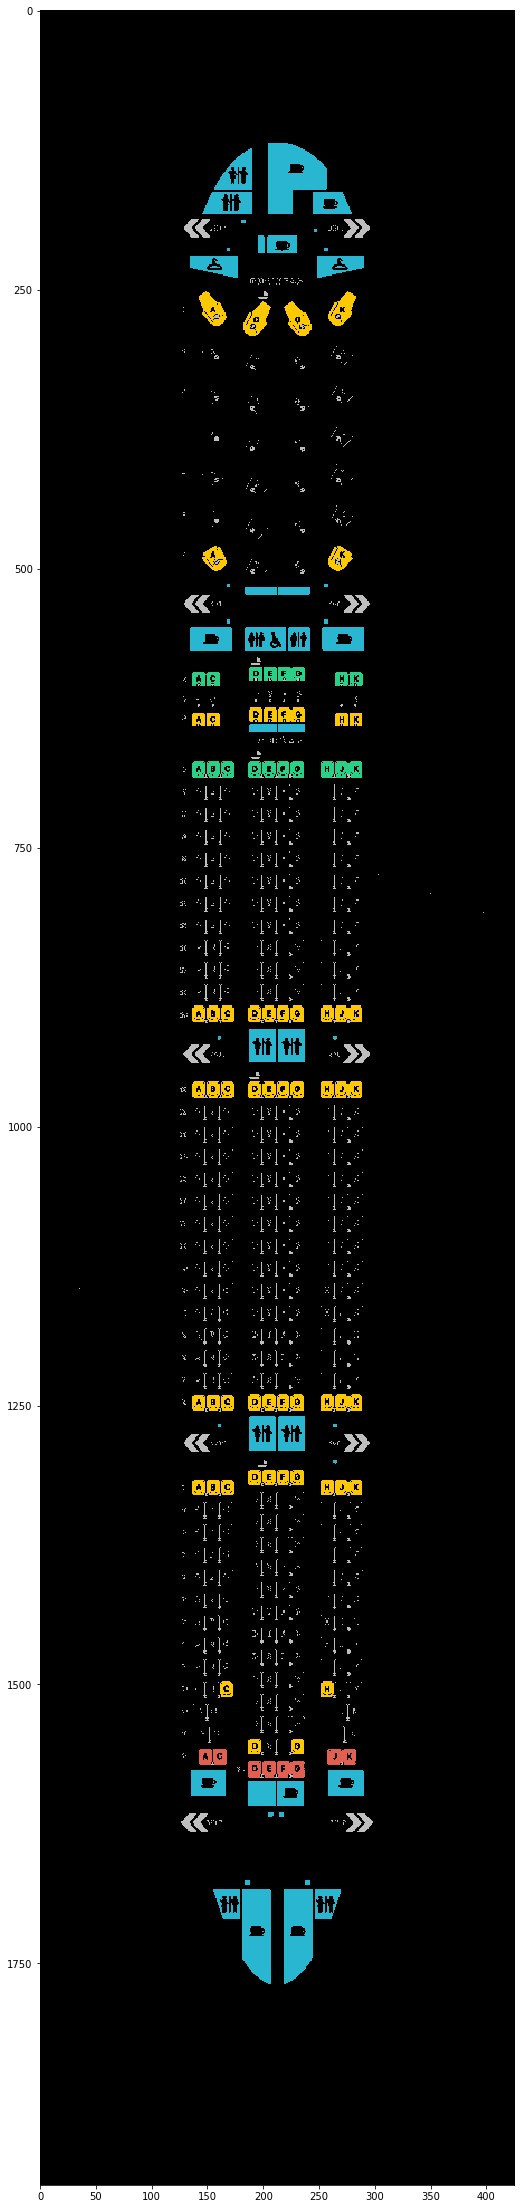

In [103]:
def sort_pixel(image):
    # Sort pixel by occurences in the image
    im = Image.open(image)
    from collections import defaultdict
    by_color = defaultdict(int)
    for pixel in im.getdata():
        by_color[pixel] += 1

    return {k: v for k, v in sorted(by_color.items(), key=lambda item: item[1], reverse=True)}

def visualisation(image):
    plt.figure(figsize=(20,40))
    plt.imshow(image.astype('uint8'))
    
    
def colour_detection(image, dico_colours, img_type, file, epsilon = 20, rgb_len = 3):
    # img_type 0 si jpg, 1 si png, 2 pour png seat maestro
    # make a copy to avoid to erase the original image
    img_copy = image.copy()
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    # for each line we get the pixel value
    for i, line in enumerate(image):
        for j, pixel in enumerate(line):
            # Get only 3 first value corresponding to R,G,B
            pixel = [int(val) if val > 1.0 else int(val*255) for val in img[i][j]][:3]
            # default value
            img_copy[i][j] = [0., 0., 0.]
            # for each colour we change the pixel value if we find the same colour
            for c, colour in enumerate(dico_colours[type_colour]):
                to_compare = dico_colours[file][img_type]
                if sum([1 if abs(p-b) < epsilon else 0 for p,b in zip(pixel, to_compare)]) == rgb_len:
                    img_copy[i][j] = dico_colours[type_colour][img_type]
    return img_copy

img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
#img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Alitalia_Airlines_Boeing_777-200_plane153.jpg')

dico_colours = {
    'seatguru': {
        'jpg':{
            "blue":[139, 168, 198], 
            "yellow": [247, 237, 86], 
            "exit": [222, 111, 100], 
            "green": [89, 185, 71], 
            "red_bad_seat": [244, 121, 123],
            "blue_seat_crew": [140,169,202],
            "baby": [184,214,240]
        }
        'png'{
            "blue":[41,182,209], 
            "yellow": [251,200,2], 
            "exit": [190,190,190], 
            "green": [41,209,135], 
            "red_bad_seat": [226,96,82],
            "blue_seat_crew": [41,182,209],
            "baby": [197,197,197]
        }
    }
    'maestro': { 
        'png'{
            "blue":[81,101,181],
            "exit": [1,120,175], 
            "green": [120,189,198], 
            "red_bad_seat": [207,90,150],
            "blue_seat_crew": [138,165,190]
        }
    }
}

res_img = colour_detection(img, dico_cols,1)
visualisation(res_img)
plt.imsave('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images_couleur/Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png',res_img.astype('uint8'))

In [65]:

img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png')
img_copy = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for i, line in enumerate(img):
        for j, pixel in enumerate(line):
            # Get only 3 first value corresponding to R,G,B
            pixel = [int(val*255) for val in img_copy[i][j]]
            print(pixel)

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 2

[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 24

[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 2

[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0,

[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 24

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243,

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[228, 214, 146]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[236, 224, 169]
[255, 255, 255]
[246, 240, 214]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[241, 233, 192]
[

[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[239, 235, 216]
[209, 181, 48]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[210, 183, 54]
[255, 255, 254]
[255, 255, 255]
[229, 213, 137]
[208, 180, 45]
[208, 180, 45]
[222, 203, 108]
[227, 210, 129]
[208, 180, 45]
[208, 180, 45]
[224, 206, 117]
[255, 255, 255]
[255, 255, 255]
[215, 191, 75]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[241, 232, 1

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[233, 223, 177]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[248, 244, 224]
[255, 255, 255]
[255, 255, 255]
[254, 254, 253]
[211, 185, 58]
[208, 180, 45]

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[196, 196, 196]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[207, 207, 207]
[243, 243, 243]
[248, 248, 248]
[217, 217, 217]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[189, 189, 189]
[196, 196, 196]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[248, 248, 248]
[248, 248, 248]
[232, 221, 167]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[235, 235, 235]
[235, 235, 235]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 2

[249, 249, 249]
[92, 92, 92]
[125, 125, 125]
[152, 152, 152]
[255, 255, 255]
[153, 153, 153]
[173, 173, 173]
[255, 255, 255]
[214, 214, 214]
[112, 112, 112]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 

[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[252, 252, 252]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0,

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[233, 224, 184]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[209, 181, 47]
[224, 206, 118]
[227, 210, 129]
[210, 184, 56]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[

[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[208, 180, 45]
[210, 184, 56]
[221, 200, 101]
[231, 217, 148]
[246, 243, 228]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255,

[2, 202, 253]
[7, 198, 250]
[41, 208, 253]
[231, 248, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[234, 234, 234]
[215, 215, 215]
[215, 215, 215]
[215, 215, 215]
[215, 215, 215]
[215, 215, 215]
[212, 212, 212]
[211, 211, 211]
[211, 211, 211]
[211, 211, 211]
[243, 243, 243]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 25

[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[219, 244, 253]
[39, 208, 252]
[0, 204, 255]
[7, 197, 250]
[1, 203, 254]
[0, 204, 255]
[0, 204, 255]
[0, 204, 255]
[48, 209, 252]
[189, 237, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[212, 212, 212]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[183, 236, 252]
[43, 208, 252]
[0, 204, 255]
[0, 204, 255]
[0, 204, 255]
[4, 201, 252]
[5, 200, 252]
[0, 204, 255]
[50, 208, 251]
[236, 250, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255

[5, 200, 252]
[2, 202, 254]
[0, 204, 255]
[0, 204, 255]
[51, 194, 242]
[189, 226, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[225, 225, 225]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[229, 229, 229]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 2

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[229, 229, 229]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[245, 245, 245]
[245, 245, 245]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[250, 250, 250]
[248, 248, 248]
[253, 253, 253]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[250, 250, 250]
[245, 245, 245]
[251, 251, 251]
[249, 

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[228, 228, 228]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[244, 244, 244]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[244, 244, 244]
[255, 255, 255]
[246, 246, 246]
[231, 231, 231]
[251, 251, 251]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[219, 219, 219]
[241, 241, 241]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[226, 226, 226]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[222, 222, 222]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[229, 229, 229]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[225, 225, 225]
[236, 236, 236]
[255, 255, 255]
[255, 255, 255]
[253, 253, 253]
[210, 210, 210]
[251, 251, 251]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[234, 234, 234]
[196, 196, 196]
[196, 196, 196]
[224, 224, 224]
[223, 223, 223]
[218, 218, 218]
[220, 220, 220]
[213, 213, 213]
[250, 250, 250]
[255, 255, 255]
[228, 228, 228]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[233, 233, 233]
[254, 254, 254]


[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[214, 214, 214]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[232, 232, 232]
[249, 249, 249]
[255, 255, 255]
[237, 237, 237]
[244, 244, 244]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[254, 254, 254]
[225, 225, 225]
[244, 244, 244]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[249, 249, 249]
[207, 207, 207]
[237, 237, 237]
[246, 246, 246]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 25

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[228, 228, 228]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[254, 254, 254]
[243, 243, 243]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[254, 254, 254]
[248, 248, 248]
[248, 248, 248]
[255, 255, 255]
[254, 254, 254]
[233, 233, 233]
[239, 239, 239]
[255, 25

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[229, 229, 229]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[215, 215, 215]
[255, 255, 255]
[255, 255, 255]
[249, 249, 249]
[214, 214, 214]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[247, 247, 247]
[241, 241, 241]
[255, 255, 255]
[255, 255, 255]
[233, 233, 233]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[234, 234, 234]
[247, 247, 247]
[255, 255, 255]
[245, 245, 245]
[236, 236, 236]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 2

[252, 252, 252]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[213, 213, 213]
[226, 226, 226]
[243, 243, 243]
[245, 245, 245]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 2

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[228, 228, 228]
[248, 248, 248]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[253, 253, 253]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[249, 249, 249]
[246, 246, 246]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[254, 254, 254]
[247, 247, 247]
[248, 248, 248]
[255, 255, 255]
[255, 255, 255]
[244, 244, 244]
[245, 245, 245]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 25

[247, 247, 247]
[250, 250, 250]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[244, 244, 244]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[246, 246, 246]
[247, 247, 247]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[253, 253, 253]
[244, 244, 244]
[255, 255, 255]
[255, 255, 255]
[207, 207, 207]
[241, 241, 241]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[214, 214, 214]
[128, 128, 128]
[119, 119, 119]
[223, 223, 223]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[236, 236, 236]
[250, 250, 250]
[255, 255, 255]
[255, 25

[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[238, 238, 238]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[213, 213, 213]
[194, 194, 194]
[190, 190, 190]
[220, 220, 220]
[197, 197, 197]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[227, 227, 227]
[213, 213, 213]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[225, 225, 225]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[255, 255, 255]
[255, 255, 255]
[241, 241, 241]
[207, 207, 207]
[232, 232, 232]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[243, 243, 243]
[208, 208, 208]
[223, 223, 223]
[211, 211, 211]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[241, 241, 241]
[114, 114, 114]
[255, 255, 255]
[230, 230, 230]
[125, 125, 125]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[248, 248, 248]
[236, 236, 236]
[255, 255, 255]
[255, 255, 255]
[222, 222, 222]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[241, 241, 241]
[227, 227, 227]
[218, 218, 218]
[247, 247, 247]
[245, 245, 245]
[230, 230, 230]
[239, 239, 239]
[255, 255, 255]
[255, 255, 255]
[248, 248, 248]
[249, 249, 249]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[248, 248, 248]
[247, 24

[223, 223, 223]
[253, 253, 253]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[231, 231, 231]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[250, 250, 250]
[207, 207, 207]
[250, 250, 250]
[251, 251, 251]
[255, 255, 255]
[255, 255, 255]
[224, 224, 224]
[222, 222, 222]
[243, 243, 243]
[244, 244, 244]
[253, 253, 253]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[245, 245, 245]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[228, 228, 228]
[250, 250, 250]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[249, 249, 249]
[248, 248, 248]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[254, 254, 254]
[244, 244, 244]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[249, 249, 249]
[248, 248, 248]
[255, 255, 255]
[255, 255, 255]
[246, 246, 246]
[254, 254, 254]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[149, 149, 149]
[158, 158, 158]
[237, 237, 237]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[228, 228, 228]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[248, 248, 248]
[245, 245, 245]
[230, 230, 230]
[252, 252, 252]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[100, 100, 100]
[180, 180, 180]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[238, 238, 238]
[243, 243, 243]
[255, 255, 255]
[255, 255, 255]
[228, 228, 228]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 

[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[251, 251, 251]
[248, 248, 248]
[255, 255, 255]
[253, 253, 253]
[232, 232, 232]
[242, 242, 242]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[234, 234, 234]
[242, 242, 242]
[255, 255, 255]
[255, 255, 255]
[238, 238, 238]
[242, 242, 242]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[238, 238, 238]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[211, 211, 211]
[201, 201, 201]
[192, 192, 192]
[213, 213, 213]
[196, 196, 196]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[246, 246, 246]
[255, 255, 255]
[255, 255, 255]
[255, 25

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[247, 247, 247]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[252, 252, 252]
[249, 249, 249]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[240, 242, 243]
[103, 196, 236]
[4, 

[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[231, 231, 231]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[193, 193, 193]
[190, 190, 190]
[202, 202, 202]
[216, 216, 216]
[221, 221, 221]
[255, 255, 255]
[255, 255, 255]
[255, 255, 255]
[250, 250, 250]
[249, 249, 249]
[255, 255, 255]
[255, 255, 255]
[253, 253, 253]
[208, 208, 208]
[235, 235, 235]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[244, 244, 244]
[244, 244, 244]
[243, 243, 243]
[215, 215, 215]
[243, 243, 243]
[244, 244, 244]
[244, 244, 244]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[243, 243, 243]
[235, 235, 235]
[213, 21

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


KeyboardInterrupt: 

In [ ]:
path = '/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/'

def doc_img(list_img, dico_cols, path, file):
    # file = LAYOUT SEATGURU or LAYOUT SEATMAESTRO
    for img in list_img:
        img = plt.imread(path+file+'/'+img)
        #img[-3:] == 'jpg' ou 'png'
        if file == 'LAYOUT SEATGURU':
            file1 = 'seatguru'
        else :
            file1 = 'maestro'
        res_img = colour_detection(img, dico_cols, img[-3:], file1)
        

In [97]:
# stri = 'Air_Canada_Boeing_777-300ER_Three_Class_v4_plane36.svg.png'
# print(stri[-3:]=='png')

True
